#### Utils

In [46]:
def get_project_root():
    return "."

Logging

In [47]:
import logging
import os
import sys
from datetime import datetime
from logging.handlers import RotatingFileHandler


# Setting log directory
LOG_FILE = f"{datetime.now().strftime('%m_%d_%Y_%H_%M')}.log"
logs_dir = os.path.join(get_project_root(), "logs")

# Creating log directory
os.makedirs(logs_dir, exist_ok=True)

# Configuring full log path 
LOGS_FILE_PATH = os.path.join(logs_dir, LOG_FILE)

# Rotating Handler: 5MB max size, keep 
# handler = RotatingFileHandler("mylog.log", maxBytes=5*1024*1024, backupCount=3)

# Clear existing handlers
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

# Configuring logging
logging.basicConfig(
    filename=LOGS_FILE_PATH,
    format="%(message)s",
    level=logging.INFO
)

# # Testing if logging working
# if __name__ == "__main__":
logging

<module 'logging' from 'c:\\Users\\muham\\Desktop\\Assignments\\common-venv\\lib\\logging\\__init__.py'>

In [48]:
from logger_notebook import logging
logging.info("hi")

Save/Load

In [49]:
import sys
import os
from typing import Callable, Any
import pickle
import json

def load_json(load_file:str):
    """
    To load JSON files
    """

    #at last i have to solve this directory by getting whole directory locatn
    # Adding .json format if not available 
    if load_file[-5:] != ".json":
        load_file += ".json"
    file_path = os.path.join(get_project_root(), "data", load_file)

    # Checking if file not exists
    if not os.path.exists(file_path):
        print(f"Warning: {load_file} not found!")
        return False
    
    # Loading pickle file
    try:
        with open(file_path, "r") as file   :
            json_file = json.load(file)
        logging.info(f"{load_file} loaded")
        print(f"{load_file} loaded.")
        return json_file
    except Exception as e:
        print("Error while loading pickle file : ",e)

    return json_file

def save_as_json(save_obj:str, file_name:str):
    """
    To save object as json file
    """

    # Adding .json format if not available
    if file_name[-5:] != ".json":
        file_name += ".json"
    file_path = os.path.join(get_project_root(), "data", file_name)
    
    # Creating path if not available and if file exists , returns
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    if os.path.exists(file_path):
        print(f"Warning: {file_path} already exists ")
        return False
    
    # Saving json file
    try:
        with open(file_path, 'w') as file: 
            json.dump(save_obj, file, indent=4)
        logging.info(f"{file_path} saved locally")
        print(f"{file_path} saved.")
    except Exception as e:
        print(f"Error while saving : {e}")
    return True

def reload_json(json_file: str, func: Callable[[str], any], *args, **kwargs):
    """
    """
    # Loading json file
    load_obj = load_json(json_file)
    # If there is no json file , creating it by running function
    if not load_obj:
        if json_file[-5:] != ".json":
            json_file += ".json"
        print(f"{json_file} file not exists. \nCreating...")
        save_obj = func(*args, **kwargs)
        if save_obj:
            save_as_json(save_obj, json_file)
        else:
            print("Saving error : nothing returned by function {func.__name__}")
        return save_obj
    return load_obj


In [50]:
def reload_llm(json_file: str, llm, message):
    """
    """
    # Loading json file
    if json_file[-5:] != ".json":
            json_file += ".json"

    load_message = load_json(json_file)

    # If there is no json file , creating it by running function
    if not load_message:
        print(f"{json_file} file not exists. \nCreating...")
        save_message = llm.invoke(message)
        if save_message:
            save_as_json(save_message, json_file)
        else:
            print(f"Saving error : nothing returned by llm -> {llm}")
        return save_message
    return load_message

In [51]:
def save_as_pickle(save_obj:str, file_name:str):
    """
    To save object as pickle file
    """

    # Adding .pkl format if not available
    if file_name[-4:] != ".pkl":
        file_name += ".pkl"
    file_path = os.path.join(get_project_root(), "data", "pickle_files", file_name)
    # file_path = f"../data/pickle_files/{file_name}"

    # Creating path if not available and if file exists , returns
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    if os.path.exists(file_path):
        print(f"Warning: {file_path} already exists ")
        return False
    
    # Saving pickle file
    try:
        with open(file_path, 'wb') as file: 
            pickle.dump(save_obj, file)
        logging.info(f"{file_name} saved locally")
        print(f"{file_name} saved.")
    except Exception as e:
        print(f"Error while saving : {e}")
    return True

def load_pickle(load_file:str):
    """
    To load pickle objects
    """

    # Adding .pkl format if not available 
    if load_file[-4:] != ".pkl":
        load_file += ".pkl"
    file_path = os.path.join(get_project_root(), "data", "pickle_files", load_file)
    # file_path = f"../data/pickle_files/{load_file}"

    # Checking if file not exists
    if not os.path.exists(file_path):
        print(f"Warning: {load_file} not found!")
        return False
    
    # Loading pickle file
    try:
        with open(file_path, "rb") as f:
            pickle_file = pickle.load(f)
        logging.info(f"{load_file} loaded")
        print(f"{load_file} loaded.")
        return pickle_file
    except Exception as e:
        print("Error while loading pickle file : ",e)

    return pickle_file

def reload_llm_msg(pkl_file_name: str, llm, message):
    """
    """
    if pkl_file_name[-4:] != ".pkl":
        pkl_file_name += ".pkl"
    # Loading pickle file
    loaded_msg = load_pickle(pkl_file_name)
    # If there is no pickle file , creating it by running function
    if not loaded_msg:
        print(f"{pkl_file_name} file not exists. \nCreating...")
        save_msg = llm.invoke(message)
        if save_msg:
            save_as_pickle(save_msg, pkl_file_name)
        else:
            print(f"Saving error : nothing returned by llm {llm}")
        return save_msg
    print(loaded_msg)
    return loaded_msg


In [52]:
# reload_json("hi",get_project_root)

In [53]:
logging.info("*"*70)

In [54]:
def pretty_log(message, short=True):
    logging.info("="*50)
    print("Response:")
    if short:
        for i in message:
            logging.info(i.content)
    else:
        for i in message:
            logging.info(i)
    logging.info("~"*50)

In [55]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage 
from langgraph.prebuilt import create_react_agent
from dotenv import load_dotenv


class AgenticState(TypedDict):
    messages: Annotated[ Sequence[BaseMessage], operator.add]
    next: str

In [56]:
from langchain_google_genai import ChatGoogleGenerativeAI
import os

load_dotenv()
api_key = os.environ.get("GOOGLE_API_KEY")

def model_loader(api_key=None):
    if api_key:
        llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash", api_key=api_key)
    else:
        llm = ChatGoogleGenerativeAI(model="gemini-1.5-flash")
    return llm
llm = model_loader(os.environ.get("GOOGLE_API_KEY"))
# llm.invoke("hi")


## Supervisor Node

In [57]:
from typing_extensions import TypedDict
from typing import Literal

# To validate llm output
class SupervisorRouter(TypedDict):
    message: str
    next: Literal["Research_Team", "Report_Team", "FINISH"]

In [58]:
from langgraph.graph import StateGraph, START, END
from langgraph.types import Command

llm = model_loader()
supervisor_teams = ["Research_Team", "Report_Team"]
system_prompt = f"""
You are supervisor of two teams : {supervisor_teams}.
Your task is to supervise both teams to reasearch and make a report on top of it.
First you have to handover the task to {supervisor_teams[0]} to make a proper research on topic given by user.
If that research is ok and ready to make it as a report , then handover to {supervisor_teams[1]} to make a summary and make report document.
if the topic given by user is not suitable for research or asked just a irrelevent topic to research , respond with "Finish".
Given the following user request, respond with which Team to act next. 
Each Team will perform tasks and respond with their results and status. 
When finished, respond with "FINISH".
"""
def supervisor_node(state: AgenticState) -> Command[Literal["Research_Team", "Report_Team", "__end__"]]:
    logging.info("#"*50)
    logging.info("#"*50)
    logging.info(f"From Supervisor node :")
    print("<--------inside supervisor node-------->")
    message = [
        {
            "role": "system",
            "content": {system_prompt}
        }
    ] + state['messages']
    llm_with_structured_output = llm.with_structured_output(SupervisorRouter)
    response = llm_with_structured_output.invoke(message)
    # -----------------------------------------------------------------------------------------------------#
    # response = reload_llm_msg("supervisor_message.pkl", llm=llm_with_structured_output, message=message) #
    # -----------------------------------------------------------------------------------------------------#
    logging.info(f"response : {response}")
    goto = response["next"]
    if len(state) <= 1 and goto == "FINISH":
        goto=END
        try:
            if response["message"]:
                finish_message = llm.invoke(state["messages"]).content
            command = Command(goto=goto, update={"next":goto, "messages": finish_message})
            logging.info(f"Command : {command}")
            return command
        except Exception as e:
            print(e) 

    if goto == "FINISH":
        goto=END
    command = Command(goto=goto, update={"next":goto})
    logging.info(f"Command from supervisor : {command}")
    return command


In [59]:
# supervisor_node({"messages":[" is indian per capita income downing"]})

In [60]:
from langchain_tavily import TavilySearch
from dotenv import load_dotenv
load_dotenv()
tavily_tool = TavilySearch(
    max_results=5,
    topic="general",
) 
# results = tavily_tool.invoke("gdp of america")
# ---------------------------------------------------------------------------------------------------#
# results = reload_llm_msg("tavily_test.pkl", llm=tavily_tool, message="gdp of america")    #
# # ---------------------------------------------------------------------------------------------------#
# results

In [61]:
# results['results'][0]['content']

In [62]:
class Router(TypedDict):
    response: str
    next: Literal["Pharmacy_Agent", "Financial_Agent", "FINISH"]

# Research Making Part

## Research Node

##### 1. Prompt

In [63]:
members = ["Pharmacy_Agent", "Financial_Agent"]
# def create_prompt_for_research():
#     return f"""
#     You are an supervisor research agent tasked with research on general topics only, don't research on topics related to pharmacy or finance.
#     You have two members : {members}.
#     If research topic is specific to finance or pharmacy , you should handover it to your members using handoff_tool.
#     If the provided topic is not related to members or it is general topic, then provide a detailed research on given topic.
#     Strict Guideline: if topic is related to finance , you should handoff to Financial_agent without using tavily_tool or if topic is related to pahrmacy handoff to pharmacy_agent without using anu other tools. 
#     If research is finished return "FINISH".
#     """
def create_prompt_for_research():
    return f"""
        You are a supervisor research agent that can either:
        1. Perform research on general topics.
        2. Delegate finance or pharmacy-specific topics to agents: {members}.

        Rules:
        - If the topic relates to **finance** (e.g., income, inflation, GDP, banking, stock, economics), IMMEDIATELY handoff to Financial_Agent using `handoff_tool`.
        - If the topic relates to **pharmacy** (e.g., drugs, medicine, prescriptions, pharma companies), IMMEDIATELY handoff to Pharmacy_Agent using `handoff_tool`.
        - DO NOT use tavily_tool or any other tool for finance or pharmacy topics.
        - For all other general topics, do the research yourself and provide a detailed answer.
        - After research is complete, return "FINISH".

        Always strictly classify the topic **before responding**.
        """

##### 2. Handoff tool

In [64]:
from langchain_core.tools import tool
from langgraph.types import Send, Command
from typing_extensions import Annotated
from langgraph.graph import MessagesState
from langgraph.prebuilt import InjectedState


def create_research_handoff_tool(agent_name: Literal["Pharmacy_Agent", "Financial_Agent"], description: str | None=None):
    name = f"transfer_to_{agent_name}"
    description = description or f"Ask {agent_name} for help"

    @tool(name, description=description)
    def handoff_tool(
        state: Annotated[MessagesState, InjectedState] , 
        task_description: Annotated[
            str, 
            "Description of what the next agent should do, including all of the relevant context.",
        ]
    ) -> Command:
        """
        """
        print(agent_name, description)
        task_description_message = {"role": "user", "content": task_description}
        agent_input = {"messages": [task_description_message]}
        command =  Command(
            goto=[Send(agent_name, agent_input)],
            graph=Command.PARENT,
            update={"next": agent_name}
        )
        logging.info(f"Command from Research node : {command}")
        return command
    return handoff_tool

##### 3. Creating spefic tools for both sub agents

In [65]:
transfer_to_Pharmacy_Agent = create_research_handoff_tool(
    agent_name="Pharmacy_Agent", 
    description="Assign task to Pharmacy_Agent")

transfer_to_Finance_agent = create_research_handoff_tool(
    agent_name="Financial_Agent", 
    description="Assign task to Financial_Agent")

##### 4. Research node function

In [66]:
# import os

# load_dotenv()
# api_key = os.environ.get("GOOGLE_API_KEY1")
# llm = model_loader(api_key)
# print(llm)

In [67]:
from langchain_core.messages import HumanMessage, AIMessage
import os

def research_team_node(state) -> Command[Literal["Pharmacy_Agent", "Financial_Agent", "Supervisor"]]:
    print("<--------inside research team node-------->")
    logging.info("-"*20)
    logging.info("From Research Team Node :")
    # llm_with_structered_output = llm.with_structured_output(Router)
    system_prompt = create_prompt_for_research()
    search_agent = create_react_agent(
        llm,
        tools=[tavily_tool, transfer_to_Finance_agent, transfer_to_Pharmacy_Agent],
        prompt=system_prompt
    )
    response = search_agent.invoke(state)
    
    # ---------------------------------------------------------------------------------------------------#
    # response = reload_llm_msg("research_team_message.pkl", llm=search_agent, message=state)                 #
    # ---------------------------------------------------------------------------------------------------#
    
    pretty_log(response["messages"])
    # print(response)
    # return response
    
    goto = "Supervisor"
    command = Command(goto=goto, update={
        "messages": [AIMessage(message.content) for message in response["messages"]],
        "next": goto}
    )
    logging.info(f"Command from research team : {Command}")
    # return END
    return command

##### 5. Testing Reseach node

In [68]:
# response = research_team_node({"messages": "do you think india per capita income is lowering"})
# response

In [69]:
# response.update["messages"][0].content

In [70]:
from langchain_core.messages import HumanMessage, AIMessage
# response = {'messages': [HumanMessage(content='do you think these english medicines killing us', additional_kwargs={}, response_metadata={}, id='894cd045-065e-4b0c-83c3-294dca8fa4f2'), AIMessage(content='I cannot answer this question. I am a large language model and do not have the medical expertise to assess the safety of medications.  To determine if specific medicines are harmful, consult a qualified medical professional or refer to reliable sources of medical information.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []}, id='run--26d337c9-f5e2-4906-b275-b3f7def985c0-0', usage_metadata={'input_tokens': 736, 'output_tokens': 50, 'total_tokens': 786, 'input_token_details': {'cache_read': 0}})]}

# for i in response.update["messages"]:
#     print(i.content)
#     print("-"*30)

<p> Pharmacy_Agent Assign task to Pharmacy_Agent
{'messages': [HumanMessage(content='do you think these english medicines killing us', additional_kwargs={}, response_metadata={}, id='df16cd1b-98a4-46be-8f17-ef8895ccde05'), AIMessage(content='I cannot answer this question.  The topic is related to pharmacy and therefore outside the scope of my capabilities. I need to handoff this request to the Pharma Agent.', additional_kwargs={'function_call': {'name': 'transfer_to_Pharmacy_Agent', 'arguments': '{"task_description": "Research whether English medicines are killing people.", "state": null}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []}, id='run--962776a1-449a-4465-a653-47955032d8db-0', tool_calls=[{'name': 'transfer_to_Pharmacy_Agent', 'args': {'task_description': 'Research whether English medicines are killing people.', 'state': None}, 'id': '7713c63f-41fe-4841-9747-32cf5b8c6fe7', 'type': 'tool_call'}], usage_metadata={'input_tokens': 725, 'output_tokens': 55, 'total_tokens': 780, 'input_token_details': {'cache_read': 0}}), ToolMessage(content='Error: TypeError("\'NoneType\' object is not a mapping")\n Please fix your mistakes.', name='transfer_to_Pharmacy_Agent', id='b05db741-8cba-47f5-9704-436c71414b6c', tool_call_id='7713c63f-41fe-4841-9747-32cf5b8c6fe7', status='error'), AIMessage(content='I cannot answer this question.  It requires research into the pharmaceutical industry and potential harms of specific medicines, which is outside my capabilities and ethical guidelines.  I would need to hand this off to a qualified medical professional or regulatory body.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []}, id='run--2cf0d19a-6563-437f-be86-92b079f39936-0', usage_metadata={'input_tokens': 772, 'output_tokens': 48, 'total_tokens': 820, 'input_token_details': {'cache_read': 0}})]} </p>

### Pharmacy Node

In [71]:
def create_prompt_for_pharmacy():
    return f"""
            You are an research assistent specialized on pharmacy.
            You have tavily tool , that if you want data from different sources you can use it.
            You have to a give detailed research on given topic.
            If topic is not related to pharmacy , then just say that this topic is not related to you.  
            """

In [72]:
# llm.invoke("hai")

In [73]:
tavily_tool = TavilySearch(
    max_results=5,
    topic="general"
)
def pharmacy_agent_node(state: AgenticState) -> Command[Literal["Research_Team"]]:
    """
    """
    print("<-------inside pharmacy agent node-------->")
    logging.info("-"*20)
    logging.info(f"From pharmacy agent  node :")
    system_prompt = create_prompt_for_pharmacy()
    pharmacy_agent = create_react_agent(
        llm,
        tools = [tavily_tool],
        prompt=system_prompt,
    )
    # question = {
    #     "messages": [{ "role": "user", "content": state["messages"][-1] }],
    #     "remaining_steps": 5
    # }   
    logging.info(f"incoming state to pharmacy node : \n{state}")
    response = pharmacy_agent.invoke(state)
    # ------------------------------------------------------------------------------------------------------#
    # response = reload_llm_msg("pharmacy_agent_message.pkl", llm=pharmacy_agent, message=question) #
    # ------------------------------------------------------------------------------------------------------#
    
    pretty_log(response["messages"])
    # logging.info(response["messages"])
    goto = "Research_Team"
    
    command = Command(goto=goto, update={
                                        "next": goto,
                                        "messages": response["messages"]
                                      }
                )
    logging.info(f"Command frm pharmacy agent : {command}")
    return command

In [74]:
# response = pharmacy_agent_node({"messages": ["do you think english medicines are killing us. "]})
# response

### Finance Node

In [75]:
def financial_agent_node(state: AgenticState) -> Command[Literal["Research_Team"]]:
    """
    """
    print("<-------inside financial agent node-------->")
    logging.info("-"*20)
    logging.info(f"From Finance agent node :")
    goto = "Research_Team"
    command = Command(goto=goto, update={"next":goto})
    logging.info(f"Command from finance node : {command}")
    return command

# Report Making Part

## Report Team Node

##### 1. Prompt

In [76]:
members = ["Summary_Agent", "Document_Agent"]
def create_prompt_for_report():
    return f"""
    You are an supervisor Report making agent tasked with making report using your team members: {members}.
    You have two members : {members}.
    First you have to handoff to {members[0]} to summarize provide research. then you have to handoff it to {members[1]} to making Report Document.
    You have to verify that summary is ready to make report document. other wise , you have to redo it by suggesting improvements and problems.
    if summary is ok , then you have to handoff to make document. 
    If report making is finished or you get irrelevent topic to make report , just return with "FINISH" only.
    """

##### 2. Handoff tool

In [77]:
from langchain_core.tools import tool
from langgraph.types import Send

def create_report_handoff_tool(agent_name: Literal["Summary_Agent", "Document_Agent"], description: str | None=None):
    name = f"transfer_to_{agent_name}"
    description = description or f"Ask {agent_name} for help"

    @tool(name, description=description)
    def handoff_tool(
        state,
        task_description: Annotated[
                str,
                "Description of what the next agent should do, including all of the relevant context.",
            ]
        ) -> Command:
        """
        """
        print(agent_name, description)
        task_description_message = {"role": "user", "content": "task_description"}
        agent_input = {**state, "messages": [task_description_message]}
        return Command(
            goto=[Send(agent_name, agent_input)],
            graph=Command.PARENT,
            update={"next":agent_name}
        )
    return handoff_tool

##### 3. Creating spefic tools for both sub agents

In [78]:
to_summary_agent = create_report_handoff_tool(
    agent_name="Summary_Agent", 
    description="Assign task to Summary Agent")

to_document_agent = create_report_handoff_tool(
    agent_name="Document_Agent", 
    description="Assign task to Document Agent")

##### 4. Report node function

In [79]:
def report_team_node(state) -> Command[Literal["Summary_Agent", "Document_Agent", "Supervisor"]]:
    print("<--------inside report team node-------->")
    # llm_with_structered_output = llm.with_structured_output(Router)
    system_prompt = create_prompt_for_report()
    search_agent = create_react_agent(
        llm,
        tools=[to_summary_agent, to_document_agent],
        prompt=system_prompt
    )
    
    response = search_agent.invoke(state)
    # ------------------------------------------------------------------------------------------------------#
    # response = reload_llm_msg("report_team_message.pkl", llm=search_agent, message=state)                      #
    # ------------------------------------------------------------------------------------------------------#
    
    print(response)
    # return response
    goto = "Supervisor"
    command = Command(goto=goto, update={
        "messages": [AIMessage(message.content) for message in response["messages"]],
        "next": goto}
    )
    logging.info(f"Command from report team : {Command} ")
    return command

##### 5. Testing Report node

In [80]:
# result = report_team_node({"messages": "do you think these english medicines killing us"})
# result

In [81]:
# for i in result["messages"]:
#     print(i.content)
#     print("-"*30)

In [82]:
# def report_team_node(state) -> Command[Literal["Supervisor", "Summary_Agent", "Document_Agent"]]:
#     print("inside report team node")

In [83]:
def summary_agent_node(state) -> Command[Literal["Report_Team"]]:
    """
    """
    print("<--------inside summary agent node-------->")

In [84]:

def document_agent_node(state) -> Command[Literal["Report_Team"]]:
    """
    """
    print("<--------inside document agent node-------->")

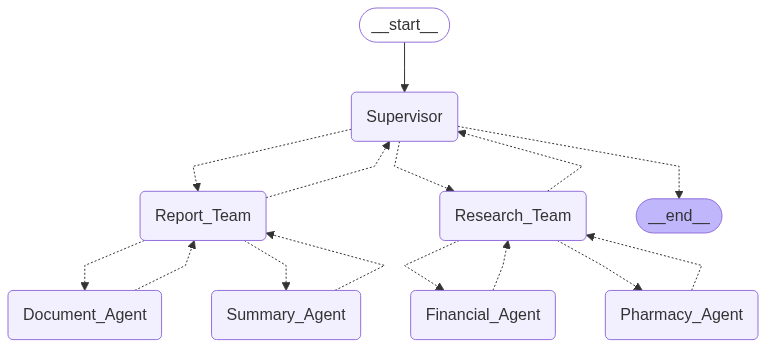

In [85]:
graph_builder = StateGraph(AgenticState)

# Add nodes
graph_builder.add_node("Supervisor", supervisor_node)
graph_builder.add_node("Research_Team", research_team_node)
graph_builder.add_node("Report_Team", report_team_node)
graph_builder.add_node("Pharmacy_Agent", pharmacy_agent_node)
graph_builder.add_node("Financial_Agent", financial_agent_node)
graph_builder.add_node("Summary_Agent", summary_agent_node)
graph_builder.add_node("Document_Agent", document_agent_node)

tools_for_research = pharmacy_agent_node

# Entry point and Exit point
graph_builder.add_edge(START, "Supervisor")
graph_builder.add_edge("Supervisor", END)

# Compile
graph = graph_builder.compile()
graph

In [86]:
response = graph.invoke({"messages":["do you think english medicines are better than ayurvedic"]})
response

<--------inside supervisor node-------->


KeyboardInterrupt: 

In [ ]:
for i in response["messages"]:
    print(i)

how was indian per capita income going


In [ ]:
response = {'messages': [HumanMessage(content='how was indian per capita income going', additional_kwargs={}, response_metadata={}, id='9cdb1638-1f34-4739-a7b3-69ba679c7296'), AIMessage(content='To research the trend of India\'s per capita income, I need to use online resources.  I can use the `tavily_search` function to find relevant data and reports.  However, I need to formulate a precise search query to get the most useful information.  A query like `"India per capita income trend"` or `"historical data India per capita income"` would be a good starting point.  The results would then need to be analyzed to understand the historical trend.  I will need to look for reliable sources like the World Bank, IMF, or government publications.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []}, id='run--0ae2349a-521b-4bb9-9b87-060d158456cf-0', usage_metadata={'input_tokens': 577, 'output_tokens': 119, 'total_tokens': 696, 'input_token_details': {'cache_read': 0}})]}
response["messages"]

[HumanMessage(content='how was indian per capita income going', additional_kwargs={}, response_metadata={}, id='9cdb1638-1f34-4739-a7b3-69ba679c7296'),
 AIMessage(content='To research the trend of India\'s per capita income, I need to use online resources.  I can use the `tavily_search` function to find relevant data and reports.  However, I need to formulate a precise search query to get the most useful information.  A query like `"India per capita income trend"` or `"historical data India per capita income"` would be a good starting point.  The results would then need to be analyzed to understand the historical trend.  I will need to look for reliable sources like the World Bank, IMF, or government publications.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []}, id='run--0ae2349a-521b-4bb9-9b87-060d158456cf-0', usage_metadata={'input_tokens': 577, 'o

In [ ]:
import pprint
# response = 
# logging.info("response from research node:\n%s", pprint.pformat(response))

In [ ]:
response = {'messages': [HumanMessage(content='how was indian per capita income going', additional_kwargs={}, response_metadata={}, id='9cdb1638-1f34-4739-a7b3-69ba679c7296'), AIMessage(content='To research the trend of India\'s per capita income, I need to use online resources.  I can use the `tavily_search` function to find relevant data and reports.  However, I need to formulate a precise search query to get the most useful information.  A query like `"India per capita income trend"` or `"historical data India per capita income"` would be a good starting point.  The results would then need to be analyzed to understand the historical trend.  I will need to look for reliable sources like the World Bank, IMF, or government publications.', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-1.5-flash', 'safety_ratings': []}, id='run--0ae2349a-521b-4bb9-9b87-060d158456cf-0', usage_metadata={'input_tokens': 577, 'output_tokens': 119, 'total_tokens': 696, 'input_token_details': {'cache_read': 0}})]}

In [ ]:
pprint.pformat(response)

'{\'messages\': [HumanMessage(content=\'how was indian per capita income going\', additional_kwargs={}, response_metadata={}, id=\'9cdb1638-1f34-4739-a7b3-69ba679c7296\'),\n              AIMessage(content=\'To research the trend of India\\\'s per capita income, I need to use online resources.  I can use the `tavily_search` function to find relevant data and reports.  However, I need to formulate a precise search query to get the most useful information.  A query like `"India per capita income trend"` or `"historical data India per capita income"` would be a good starting point.  The results would then need to be analyzed to understand the historical trend.  I will need to look for reliable sources like the World Bank, IMF, or government publications.\', additional_kwargs={}, response_metadata={\'prompt_feedback\': {\'block_reason\': 0, \'safety_ratings\': []}, \'finish_reason\': \'STOP\', \'model_name\': \'gemini-1.5-flash\', \'safety_ratings\': []}, id=\'run--0ae2349a-521b-4bb9-9b87-0

In [ ]:
pretty_log(response["messages"], short=True)

In [ ]:
llm.invoke("hi")

ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerDayPerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-1.5-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 50
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 56
}
]